In [11]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [12]:
# merge city and ride tables to city_ride_table via left merge

city_ride_table = pd.merge(ride_df, city_df, on="city", how = "left")
city_ride_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [5]:
# create city x type df with x, y and s values via groupby w/ .agg

plot_city_ride = city_ride_table.groupby(['city', 'type']).agg({'ride_id': 'count', 'fare': 'mean', 
                                                                'driver_count': 'mean'}).reset_index()
plot_city_ride.head()

,city,type,ride_id,fare,driver_count
0,Amandaburgh,Urban,18,24.641667,12
1,Barajasview,Urban,22,25.332273,26
2,Barronchester,Suburban,16,36.422500,11
3,Bethanyland,Suburban,18,32.956111,22
4,Bradshawfurt,Rural,10,40.064000,7


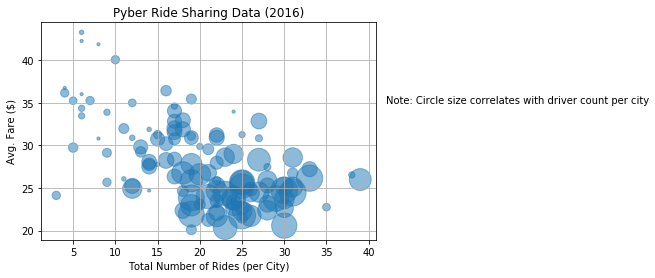

In [113]:
# method 2 - use plt. functions to control line by line -- recommended inclass, xu et. al..."create canvass"
plt.scatter(plot_city_ride['ride_id'], plot_city_ride['fare'], plot_city_ride['driver_count'] *10, alpha = 0.5)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Avg. Fare ($)")
plt.text(42, 35, "Note: Circle size correlates with driver count per city")
plt.grid()
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [73]:
# City type fare % of total breakdown

type_fare_ptot = city_ride_table.groupby('type')['fare'].sum().reset_index()
type_fare_ptot['ptot'] =(100 * type_fare_ptot['fare'] /type_fare_ptot['fare'].sum())
type_fare_ptot


,type,fare,ptot
0,Rural,4327.93,6.811493
1,Suburban,19356.33,30.463872
2,Urban,39854.38,62.724635


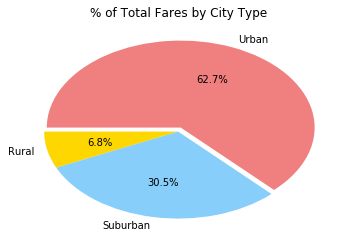

In [115]:
# use plt.pie, including autopct arg
plt.pie(type_fare_ptot['fare'], labels = ('Rural', 'Suburban', 'Urban'),
        colors = ['gold', 'lightskyblue', 'lightcoral'],
        startangle=180, autopct='%1.1f%%',
        explode = (0.0, 0, 0.05) )
plt.title("% of Total Fares by City Type")
plt.show()




## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [105]:
rides = len(ride_df.index)
type_rides_ptot = city_ride_table.groupby('type')['ride_id'].count().reset_index()
type_rides_ptot['ptot'] =( 100* type_rides_ptot['ride_id'] /rides)
type_rides_ptot

,type,ride_id,ptot
0,Rural,125,5.263158
1,Suburban,625,26.315789
2,Urban,1625,68.421053


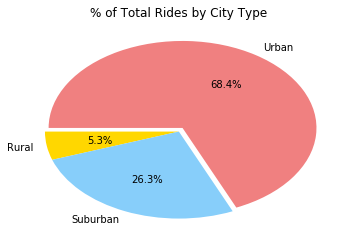

In [116]:
# use plt.pie, including autopct arg
plt.pie(type_rides_ptot['ride_id'], labels = ('Rural', 'Suburban', 'Urban'),
        colors = ['gold', 'lightskyblue', 'lightcoral'],
        startangle=180, autopct='%1.1f%%',
        explode = (0.0, 0, 0.05) )
plt.title("% of Total Rides by City Type")
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [100]:
# City type driver % of total breakdown

type_dcount_ptot = city_df.groupby('type')['driver_count'].sum().reset_index()
type_dcount_ptot['ptot'] =(100 * type_dcount_ptot['driver_count']/type_dcount_ptot['driver_count'].sum())
type_dcount_ptot


,type,driver_count,ptot
0,Rural,78,2.623613
1,Suburban,490,16.481668
2,Urban,2405,80.894719


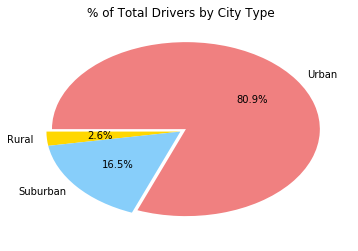

In [117]:
# use plt.pie, including autopct arg
plt.pie(type_dcount_ptot['driver_count'], labels = ('Rural', 'Suburban', 'Urban'),
        colors = ['gold', 'lightskyblue', 'lightcoral'],
        startangle=180, autopct='%1.1f%%',
        explode = (0.0, 0, 0.05) )
plt.title("% of Total Drivers by City Type")
plt.show()